In [ ]:
import numpy as np
!pip install GPy
import GPy
from sklearn.feature_extraction.text import CountVectorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyLDAvis &> /dev/null

In [ ]:
import numpy as np
import pandas as pd

import json
import glob

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

 /usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning:Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working


In [ ]:
from gensim.models import LdaModel, LdaMulticore
import gensim.downloader as api
from gensim.utils import simple_preprocess, lemmatize
from nltk.corpus import stopwords
import re
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

In [ ]:
import pickle
from pprint import pprint
import collections
import numpy 
import matplotlib.pyplot as plt
import operator
import array
import pandas as pd


# Natural Language Tool Kit (NLTK) imports
import nltk
from nltk.data  import load
from nltk.tokenize.treebank import TreebankWordTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# Machine Learning Library (sklearn) imports
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer , CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

from gensim.models import TfidfModel

In [ ]:
# Install nltk, Library suited for text mining and texts processing
import nltk
nltk.download('punkt') # containing the tokeinzers
import nltk
nltk.download('stopwords')  # Frequent or meaningless words of,an,a...

# Split a text into sentences
sentence_splitter = load('tokenizers/punkt/english.pickle')

# Split a sentence into words
tokenizer = TreebankWordTokenizer()

# Reduce to word to the root
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
punctuation = set([",", ".", ";", "/", ":", "-", "--" ,"!", "?", "(", ")","'",'"',"''", "``"])

# Set of common english words
stopwords_set = set(stopwords.words('english'))  # very common words in english
 

In [ ]:
# Preprocess a given text
def preprocess_text(review):
    tokens = []
    # A. Split into sentences
    for sentence in sentence_splitter.tokenize(review):
        # B. Split into tokens
        for token in tokenizer.tokenize(sentence):
            token = token.lower()
            # C. Filter on stoplist and punctuation
            if token not in stopwords_set and token not in punctuation:
                # D. Stemming (takes root)
                stem = stemmer.stem(token)
                tokens.append(stem)
    return tokens

In [ ]:
# Import the set of positive book reviews
with open('/content/positive_text_book.review', 'r') as myfile: #positive reviwes about books
    pos_books = myfile.readlines()

# Import the set of negative book reviews
with open('/content/negative_text_book.review', 'r') as myfile: #negative reviwes about books
    neg_books = myfile.readlines()


In [ ]:
# Dictionary of texts
B_pos={}
B_neg={}

# All possible words
features=[]

for i in range(1000):
  # Preprocess the i-th text
  pre_pos=preprocess_text(pos_books[i].replace("'",' '))
  pre_neg=preprocess_text(neg_books[i].replace("'",' '))

  # Add the text to the dictionary
  B_pos[i]=pre_pos
  B_neg[i]=pre_neg

  # Add all the tokens to the list
  for j in pre_pos:
    features.append(j)
  for j in pre_neg:
    features.append(j)

# list to set 
features=set(features)

# set to dictionary
feat={}

k=0
# Each word in features is associated to an integer (index of columns)
for i in features:
   feat[i]=k
   k+=1

In [ ]:
a = list(B_pos.values())
b = list(B_neg.values())

data = a + b
len(data)

aa=list(pos_books)
bb=list(neg_books)
data_c=aa+bb
len(data_c)

2000

In [ ]:
import numpy as np
import GPy
from sklearn.feature_extraction.text import CountVectorizer

# Pre-process the text data
text_data = data_c.copy()  # List of documents
text_data = [str(doc) for doc in text_data]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data).toarray()
vocab = vectorizer.vocabulary_

# Initialize the number of topics
num_topics = 10

# Initialize the Gaussian Process model
k = GPy.kern.RBF(input_dim=num_topics, variance=1., lengthscale=1.)
model = GPy.models.BayesianGPLVM(X, input_dim=num_topics, kernel=k)

# Fit the model to the data
model.optimize(messages=True, max_iters=100)

# Extract the topics from the model
# Get the latent mean (topic-word matrix)
#latent_mean = model.latent_mean
#topic_word_matrix = np.dot(latent_mean, model.kern.K(latent_mean)) 

INFO:BayesianGPLVM:initializing latent space X with method PCA
INFO:BayesianGPLVM:initializing latent space variance ~ uniform(0,.1)
INFO:BayesianGPLVM:initializing inducing inputs
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:sparse gp:Adding Z as parameter


In [ ]:
latent_mean = model.X
matrix = latent_mean.mean
matrix.shape

(2000, 10)

In [ ]:
#GP CLASSIFIER 
!pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import GPy
import numpy as np
neg = np.zeros(1000)
pos = np.ones(1000)
y = np.concatenate([pos,neg])
# Load the preprocessed text data and the topic distributions
X = matrix # shape: (n_samples, n_topics)
Y = y # shape: (n_samples, n_outputs)

n_outputs = 1
Y = Y.reshape(-1, n_outputs)

# Binarize the labels to two classes
y = (y == 0).astype(int)

# Define the Gaussian Process classifier
kernel = GPy.kern.Exponential(input_dim=num_topics)
model = GPy.models.GPClassification(X, Y , kernel=kernel)

# Train the GP model
model.optimize()

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


In [ ]:
y_pred, _ = model.predict(X)
accuracy = np.mean(np.round(y_pred) == Y)
accuracy

0.9475

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y, np.round(y_pred))
cm

array([[945,  55],
       [ 50, 950]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(Y, np.round(y_pred), average='binary')
print(f1_score)
print(precision)
print(recall)

0.9476309226932668
0.945273631840796
0.95


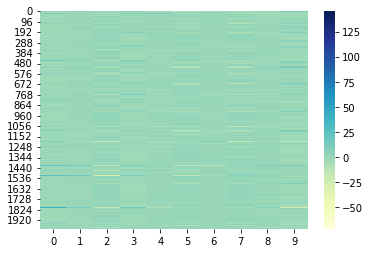

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# topic_word_matrix is the matrix that you want to plot

# Plot the heatmap
sns.heatmap(matrix, cmap="YlGnBu")

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X = X_train # shape: (n_samples, n_topics)
Y = y_train # shape: (n_samples, n_outputs)

n_outputs = 1
Y = Y.reshape(-1, n_outputs)

# Binarize the labels to two classes
y = (y == 0).astype(int)

# Define the Gaussian Process classifier
kernel = GPy.kern.Exponential(input_dim=10)
model_split = GPy.models.GPClassification(X, Y , kernel=kernel)
model_split.optimize()
y_pred, _ = model_split.predict(X_test)
accuracy = np.mean(np.round(y_pred) == y_test)

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


In [ ]:
accuracy


0.5000888888888889

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, np.round(y_pred))
cm

array([[179, 123],
       [129, 169]])

attempt using only 2 topics

In [ ]:
# Pre-process the text data
text_data = data_c.copy()  # List of documents
text_data = [str(doc) for doc in text_data]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data).toarray()
vocab = vectorizer.vocabulary_

# Initialize the number of topics
num_topics = 2

# Initialize the Gaussian Process model
k = GPy.kern.RBF(input_dim=num_topics, variance=1., lengthscale=1.)
model = GPy.models.BayesianGPLVM(X, input_dim=num_topics, kernel=k)

# Fit the model to the data
model.optimize(messages=True, max_iters=100)

# Extract the topics from the model
# Get the latent mean (topic-word matrix)
#latent_mean = model.latent_mean
#topic_word_matrix = np.dot(latent_mean, model.kern.K(latent_mean)) 

INFO:BayesianGPLVM:initializing latent space X with method PCA
INFO:BayesianGPLVM:initializing latent space variance ~ uniform(0,.1)
INFO:BayesianGPLVM:initializing inducing inputs
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:sparse gp:Adding Z as parameter


In [ ]:

y = np.concatenate([pos,neg])

Y = y # shape: (n_samples, n_outputs)

n_outputs = 1
Y = Y.reshape(-1, n_outputs)

# Binarize the labels to two classes
y = (y == 0).astype(int)
y_pred, _ = model.predict(X)
accuracy = np.mean(np.round(y_pred) == Y)
accuracy


0.49977887179943103